In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from random import choice

In [3]:
import os, sys
sys.path.append(os.path.join(os.path.expanduser('~'), 'Documents', 'Insert-Generic-Name-Here'))
# sys.path

from lonelyboy.geospatial import plots as gsplt
from lonelyboy.geospatial import preprocessing as gspp
from lonelyboy.timeseries import lbtimeseries as tspp
# from lonelyboy.geospatial import group_patterns as gsgp

In [9]:
# df = pd.read_csv('data_mmsis/246090000.csv')
# df = pd.read_csv('data_mmsis/220236000.csv')
ports = pd.read_pickle('data/ports_raw.pkl')

In [5]:
df = pd.read_csv(f'data_mmsis/{choice(os.listdir("data_mmsis"))}')
df.drop_duplicates(['ts'], inplace=True)
df.sort_values('ts', inplace=True)
df.reset_index(inplace=True)
plt.subplot(2,2,1)
df.ts.plot(figsize=(15,10), label='time', legend=True)
plt.subplot(2,2,2)
df.ts.diff().plot(label='1st diff ts', legend=True)  
plt.axhline(60*60*12, color='red')
# plt.subplot(2,2,3)
# old = gspp.resample_and_segment(df.copy(), ports, pre_segment_threshold=0)                 
# old.ts.plot(label='old ts', legend=True)
# plt.subplot(2,2,4)
new = gspp.resample_and_segment(df.copy(), ports)
# new.ts.plot(label='new ts', legend=True) 
                 
                 


NameError: name 'df' is not defined

In [5]:
df.iloc[709:714]

,index,mmsi,status,turn,speed,course,heading,lon,lat,ts
709,4473,246090000,0.0,0.0,13.3,39.0,40,-5.348615,48.536520,1446180489
710,4474,246090000,0.0,0.0,13.4,41.0,38,-5.346798,48.537870,1446180518
711,695,246090000,0.0,0.0,9.2,121.0,123,-4.958231,48.189716,1446977607
712,696,246090000,0.0,0.0,9.2,119.0,123,-4.955382,48.188650,1446977657
713,697,246090000,0.0,0.0,9.2,117.0,125,-4.954865,48.188465,1446977667


In [6]:
# new.sort_values('ts', inplace=True)
# new.reset_index(inplace=True)
new.ts.plot(label='new ts', legend=True)

NameError: name 'new' is not defined

/home/theo/anaconda3/envs/gsa/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/theo/anaconda3/envs/gsa/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/theo/anaconda3/envs/gsa/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http:

0
1
4.0


/home/theo/anaconda3/envs/gsa/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


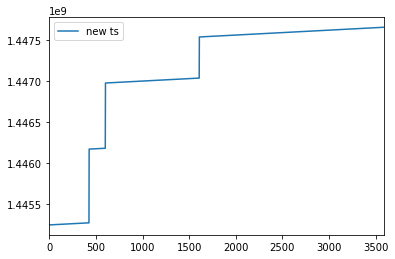

In [5]:
new, _ = gspp.resample_and_segment(df.copy(), ports, pois_alpha=-1)
new.ts.plot(label='new ts', legend=True) 
                 

In [7]:
[0, *brp]

[0, 426, 601, 1608]

In [6]:
brp = new.ts.diff(-1).abs().index[new.ts.diff()>60*60*12]

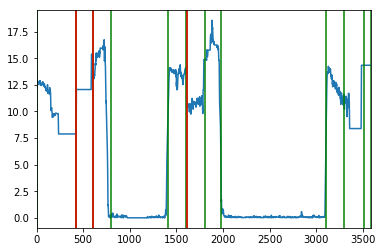

In [9]:
new.velocity.plot()
[[plt.axvline((point+[0, *brp][ind]), c='green') for point in group] for ind, group in enumerate(new.pois.apply(tuple).unique())]
[plt.axvline(pnt, c='red') for pnt in brp]
plt.savefig('KOBE.png', dpi=100)


In [41]:
new.pois.apply(tuple).unique()

array([(0, 425), (0, 174), (0, 199, 323, 835, 1006),
       (0, 228, 354, 379, 550, 1511, 1666, 1807, 1867, 1920, 1982)],
      dtype=object)

In [36]:
[[print((point+[0, *brp][ind], ind)) for point in group] for ind, group in enumerate(new.pois.unique())]

TypeError: unhashable type: 'list'

/home/theo/anaconda3/envs/gsa/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/theo/anaconda3/envs/gsa/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/theo/anaconda3/envs/gsa/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http:

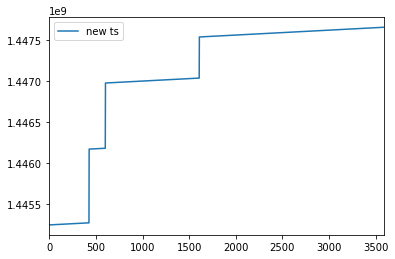

In [12]:
new = gspp.resample_and_segment(df.copy(), ports)
new.ts.plot(label='new ts', legend=True) 
                 

In [6]:
new.loc[new.datetime == '2015-11-08 10:13:00']

,index,mmsi,turn,speed,course,heading,lon,lat,ts,geom,datetime,real_point,velocity,traj_id
601,695.0,246090000.0,0.0,9.2,121.0,123.0,-4.958231,48.189716,1.446978e+09,POINT (-4.958231400000002 48.189716),2015-11-08 10:13:00,1,13.022778,0.0


In [24]:
new.mmsi

0       246090000.0
1       246090000.0
2       246090000.0
3       246090000.0
4       246090000.0
5       246090000.0
6       246090000.0
7       246090000.0
8       246090000.0
9       246090000.0
10      246090000.0
11      246090000.0
12      246090000.0
13      246090000.0
14      246090000.0
15      246090000.0
16      246090000.0
17      246090000.0
18      246090000.0
19      246090000.0
20      246090000.0
21      246090000.0
22      246090000.0
23      246090000.0
24      246090000.0
25      246090000.0
26      246090000.0
27      246090000.0
28      246090000.0
29      246090000.0
           ...     
3561    246090000.0
3562    246090000.0
3563    246090000.0
3564    246090000.0
3565    246090000.0
3566    246090000.0
3567    246090000.0
3568    246090000.0
3569    246090000.0
3570    246090000.0
3571    246090000.0
3572    246090000.0
3573    246090000.0
3574    246090000.0
3575    246090000.0
3576    246090000.0
3577    246090000.0
3578    246090000.0
3579    246090000.0


In [11]:
%%time
dfs = np.split(df, df.ts.diff(-1).abs().index[df.ts.diff()>60*60*24])
print(len(dfs))

2
CPU times: user 1.4 ms, sys: 267 µs, total: 1.67 ms
Wall time: 1.57 ms


In [8]:
len(dfsprep)

2

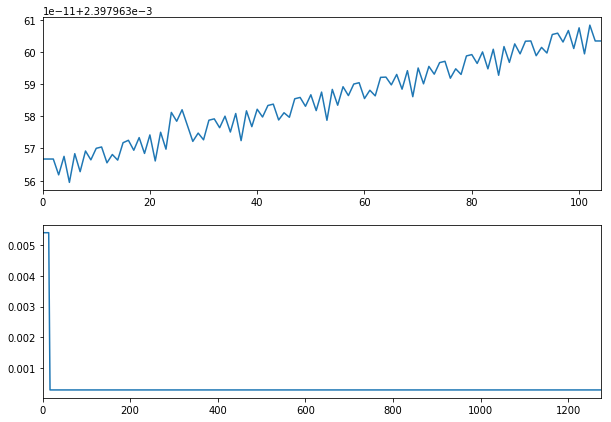

In [12]:
for ind, df in enumerate(dfsprep,1):
    plt.subplot(len(dfsprep),1,ind)
    df.velocity.plot(figsize=(10,7))

In [19]:
dfs[0]

,index,mmsi,status,turn,speed,course,heading,lon,lat,ts
0,0,351392000,0.0,-6.0,14.5,27.0,30,-6.221598,47.943817,1444441478
1,1,351392000,0.0,0.0,14.5,27.0,30,-6.220782,47.944866,1444441496
2,2,351392000,0.0,0.0,14.4,27.0,30,-6.219665,47.946300,1444441520
3,3,351392000,0.0,-4.0,14.4,27.0,30,-6.219399,47.946650,1444441526
4,4,351392000,0.0,0.0,14.4,27.0,30,-6.219115,47.947018,1444441533
5,5,351392000,0.0,-6.0,14.4,27.0,30,-6.218015,47.948433,1444441556
6,6,351392000,0.0,8.0,14.5,27.0,30,-6.216965,47.949818,1444441580


In [12]:
tmp1 = gspp.resample_and_segment(df.copy(), ports)
tmp2 = gspp.resample_and_segment(df.copy(), ports, pre_segment_threshold=0)

/home/theo/Code/lonelyboy/geospatial/preprocessing.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gdf['next_loc'] = gdf.next_loc.apply(lambda x : (x.x,x.y))
/home/theo/Code/lonelyboy/geospatial/preprocessing.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gdf['velocity'] = gdf[['current_loc', 'next_loc']].apply(lambda x : haversine(x[0], x[1])*0.539956803 , axis=1).multiply(3600/gdf.ts.diff(-1).abs())
/home/theo/Code/lonelyboy/geospatial/preprocessing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [16]:
tmp1

,index,mmsi,turn,speed,course,heading,lon,lat,ts,geom,datetime,real_point,velocity,traj_id,pois
0,0,351392000,-6.0,14.5,27.0,30,-6.221598,47.943817,1444441478,POINT (-6.221598 47.943817),2015-10-10 01:44:00,1,0.0,0,"(0, 1)"
1,2,351392000,0.0,14.4,27.0,30,-6.219665,47.946300,1444441520,POINT (-6.219665 47.9463),2015-10-10 01:45:00,1,0.0,0,"(0, 1)"


In [5]:
df


,index,mmsi,status,turn,speed,course,heading,lon,lat,ts
0,11,538003450,0.0,0.0,12.3,239.0,238,-3.265148,49.873116,1445597295
1,0,538003450,0.0,0.0,9.3,320.0,307,-5.532299,48.192650,1449884830
2,1,538003450,0.0,0.0,8.7,320.0,307,-5.534765,48.194565,1449884890
3,2,538003450,0.0,0.0,8.7,320.0,307,-5.535565,48.195217,1449884910
4,3,538003450,0.0,0.0,8.6,323.0,307,-5.558199,48.214317,1449885491
5,4,538003450,0.0,0.0,8.5,323.0,307,-5.564198,48.219616,1449885660
6,5,538003450,0.0,0.0,9.1,324.0,307,-5.689732,48.331783,1449888870
7,6,538003450,0.0,0.0,9.0,323.0,307,-5.691248,48.333183,1449888911
8,7,538003450,0.0,0.0,8.7,323.0,307,-5.694048,48.335785,1449888990
9,8,538003450,0.0,0.0,9.0,323.0,307,-5.698565,48.339800,1449889111


In [7]:
vessel = df.copy()

In [8]:
vessel['datetime'] = pd.to_datetime(vessel['ts'], unit='s')
#resample and interpolate using the method given. Linear is suggested
upsampled = vessel.resample('60S',on='datetime', loffset=True, kind='timestamp').first()
interpolated = upsampled.interpolate(method='linear')
# #interpolate the geom column with the correct point objects using lat and lon
# interpolated['geom'] = interpolated[['lon', 'lat']].apply(lambda x: Point(x[0], x[1]), axis=1)
# # reset the index to normal and use the old index as new timestamp
# interpolated['datetime'] = interpolated.index
# interpolated.reset_index(drop=True, inplace=True)
# #drop lat and lon if u like
# if drop_lon_lat:
#     interpolated = interpolated.drop(['lat', 'lon'], axis=1)
# return gpd.GeoDataFrame(interpolated, crs = crs, geometry='geom')

In [78]:
type(interpolated.iloc[0].datetime) == pd._libs.tslibs.timestamps.Timestamp

True

In [28]:
df.apply(lambda x: x.name, axis=1)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int64

In [80]:
interpolated

,index,mmsi,turn,speed,course,heading,lon,lat,ts,geom,datetime,real_point
datetime,,,,,,,,,,,,
2015-10-22 21:33:00,2.000000,477746600.0,0.0,0.0,156.000000,77.000000,-2.124698,47.303432,1.445550e+09,POINT (-2.1246984 47.303432),2015-10-22 21:33:44,1
2015-10-22 21:34:00,2.066667,477746600.0,0.0,0.0,156.000000,77.000000,-2.124700,47.303431,1.445550e+09,NaN,NaT,0
2015-10-22 21:35:00,2.133333,477746600.0,0.0,0.0,156.000000,77.000000,-2.124701,47.303430,1.445550e+09,NaN,NaT,0
2015-10-22 21:36:00,2.200000,477746600.0,0.0,0.0,156.000000,77.000000,-2.124702,47.303429,1.445550e+09,NaN,NaT,0
2015-10-22 21:37:00,2.266667,477746600.0,0.0,0.0,156.000000,77.000000,-2.124703,47.303428,1.445550e+09,NaN,NaT,0
2015-10-22 21:38:00,2.333333,477746600.0,0.0,0.0,156.000000,77.000000,-2.124704,47.303427,1.445550e+09,NaN,NaT,0
2015-10-22 21:39:00,2.400000,477746600.0,0.0,0.0,156.000000,77.000000,-2.124705,47.303426,1.445550e+09,NaN,NaT,0
2015-10-22 21:40:00,2.466667,477746600.0,0.0,0.0,156.000000,77.000000,-2.124706,47.303425,1.445550e+09,NaN,NaT,0
2015-10-22 21:41:00,2.533333,477746600.0,0.0,0.0,156.000000,77.000000,-2.124707,47.303424,1.445550e+09,NaN,NaT,0


In [6]:
tmp = gspp._resample_and_calculate_velocity_vessel(df, velocity_window=3, velocity_drop_alpha=3, smoothing=True, res_rule = '60S', res_method='linear', crs = {'init': 'epsg:4326'}, drop_lon_lat = False, resampling_first=True, drop_outliers=False)

/home/theo/Code/lonelyboy/geospatial/preprocessing.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gdf['next_loc'] = gdf.next_loc.apply(lambda x : (x.x,x.y))
/home/theo/Code/lonelyboy/geospatial/preprocessing.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gdf['velocity'] = gdf[['current_loc', 'next_loc']].apply(lambda x : haversine(x[0], x[1])*0.539956803 , axis=1).multiply(3600/gdf.ts.diff(-1).abs())
/home/theo/Code/lonelyboy/geospatial/preprocessing.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [8]:
tmp.real_point.sum()

10

In [15]:
tmp.real_point.sum()

152

In [10]:
df

,index,mmsi,status,turn,speed,course,heading,lon,lat,ts,datetime
0,11,538003450,0.0,0.0,12.3,239.0,238,-3.265148,49.873116,1445597295,2015-10-23 10:48:15
1,0,538003450,0.0,0.0,9.3,320.0,307,-5.532299,48.192650,1449884830,2015-12-12 01:47:10
2,1,538003450,0.0,0.0,8.7,320.0,307,-5.534765,48.194565,1449884890,2015-12-12 01:48:10
3,2,538003450,0.0,0.0,8.7,320.0,307,-5.535565,48.195217,1449884910,2015-12-12 01:48:30
4,3,538003450,0.0,0.0,8.6,323.0,307,-5.558199,48.214317,1449885491,2015-12-12 01:58:11
5,4,538003450,0.0,0.0,8.5,323.0,307,-5.564198,48.219616,1449885660,2015-12-12 02:01:00
6,5,538003450,0.0,0.0,9.1,324.0,307,-5.689732,48.331783,1449888870,2015-12-12 02:54:30
7,6,538003450,0.0,0.0,9.0,323.0,307,-5.691248,48.333183,1449888911,2015-12-12 02:55:11
8,7,538003450,0.0,0.0,8.7,323.0,307,-5.694048,48.335785,1449888990,2015-12-12 02:56:30
9,8,538003450,0.0,0.0,9.0,323.0,307,-5.698565,48.339800,1449889111,2015-12-12 02:58:31


In [9]:
tmp

,index,mmsi,status,turn,speed,course,heading,lon,lat,ts,datetime,real_point,geom,velocity
0,11.000000,538003450.0,0.0,0.0,12.300000,239.000000,238.000000,-3.265148,49.873116,1.445597e+09,2015-10-23 10:48:00,1,POINT (-3.2651484 49.873116),0.142185
1,10.999846,538003450.0,0.0,0.0,12.299958,239.001134,238.000966,-3.265180,49.873092,1.445597e+09,2015-10-23 10:49:00,0,POINT (-3.265180126587274 49.87309248349403),0.142185
2,10.999692,538003450.0,0.0,0.0,12.299916,239.002267,238.001931,-3.265212,49.873069,1.445597e+09,2015-10-23 10:50:00,0,POINT (-3.265211853174548 49.87306896698806),0.142185
3,10.999538,538003450.0,0.0,0.0,12.299874,239.003401,238.002897,-3.265244,49.873045,1.445597e+09,2015-10-23 10:51:00,0,POINT (-3.265243579761822 49.8730454504821),0.142185
4,10.999384,538003450.0,0.0,0.0,12.299832,239.004534,238.003862,-3.265275,49.873022,1.445598e+09,2015-10-23 10:52:00,0,POINT (-3.265275306349095 49.87302193397613),0.142185
5,10.999230,538003450.0,0.0,0.0,12.299790,239.005668,238.004828,-3.265307,49.872998,1.445598e+09,2015-10-23 10:53:00,0,POINT (-3.265307032936369 49.87299841747016),0.142185
6,10.999076,538003450.0,0.0,0.0,12.299748,239.006801,238.005794,-3.265339,49.872975,1.445598e+09,2015-10-23 10:54:00,0,POINT (-3.265338759523643 49.87297490096419),0.142185
7,10.998922,538003450.0,0.0,0.0,12.299706,239.007935,238.006759,-3.265370,49.872951,1.445598e+09,2015-10-23 10:55:00,0,POINT (-3.265370486110917 49.87295138445823),0.142185
8,10.998769,538003450.0,0.0,0.0,12.299664,239.009068,238.007725,-3.265402,49.872928,1.445598e+09,2015-10-23 10:56:00,0,POINT (-3.265402212698191 49.87292786795226),0.142185
9,10.998615,538003450.0,0.0,0.0,12.299622,239.010202,238.008690,-3.265434,49.872904,1.445598e+09,2015-10-23 10:57:00,0,POINT (-3.265433939285465 49.87290435144629),0.142185
